# Capstone : IT Ticket Classification [SEPT SUN GRP 4B]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Aim: Automatic Ticket Assignment [Part 4/6]


Build a classifier that can classify the tickets by analyzing text. Classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

## Part 4/6: Model Building - Deep Learning

- Building a model architecture which can classify
- Trying different model architectures by researching state of the art for similar tasks
- Train the model
- To deal with large training time, save the weights so that we can use them when training the model for the second time without starting from scratch.

# Import Libraries

In [110]:
import pandas as pd 
import numpy as np 
import re 
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

import warnings
import pandas.testing as tm
import spacy  
#import langid 
import nltk

import re, string
from wordcloud import WordCloud
from pprint import pprint

from sklearn.utils import resample
from sklearn import preprocessing

from nltk.corpus import stopwords
from nltk.classify.textcat import TextCat  
from dateutil import parser
from nltk.tokenize import word_tokenize
#from langdetect import detect
from textblob import TextBlob
#from googletrans import Translator

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

#import pyLDAvis
#import pyLDAvis.gensim 

from sklearn.decomposition import LatentDirichletAllocation

from string import punctuation

#import enchant
#from enchant.checker import SpellChecker

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
    
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from scipy import spatial
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

import logging, warnings
from PIL import Image

##--------------------##

if sys.version_info >= (3, 3) :
    import collections.abc as collections_abc
else:
    import collections as collections_abc
    
from collections import Counter
from collections import OrderedDict
import operator
from sklearn.metrics import classification_report, confusion_matrix

##-------------------##

plt.style.use('ggplot')
%matplotlib inline

#warnings.filterwarnings("ignore",category=DeprecationWarning)
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [178]:
np.__version__ , pd.__version__,tf.__version__, print(sys.version_info)

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


('1.18.5', '1.0.5', '2.3.0', None)

In [179]:
"""
Download required NLTK stopwords corpus if it has not already been downloaded.
Download required NLTK corpora if they have not already been downloaded.
Download the NLTK averaged perceptron tagger that is required for this algorithm to run only if the corpora has not already been downloaded.
Download Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences
"""
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True) 

True

# Data Loading

In [180]:
#"""
# from google.colab import drive
# drive.mount('/content/drive')

# project_path = '/content/drive/My Drive/Colab Notebooks/GLCapstone/'
file_name ='/content/drive/My Drive/itsupportdatacleaned_3.csv'

#"""
#project_path = 'C:/MyDrive/Drive2/PersonalDrive/MachineLearning/GreatLearning/CapstoneProject/Final-Deck/'
#file_name ='itsupportdatacleaned_3.csv'

In [181]:
data=pd.read_csv(file_name,encoding=sys.getfilesystemencoding()) 
data.head(2).T

,0,1
Short description,collaboration_platform site is not opening,account locked.
Description,collaboration platform site open collaboration...,account lock account lock account lock
Caller,anpocezt qturbxsg,bkyphsgq cfyksehu
Assignment group,GRP_0,GRP_0
New_Assignment_Groups,0,0
Text_length,85,29
Dominant_Topic,0,0
Topic_Perc_Contrib,0.5195,0.9538
Keywords,"issue, unable, tool, user, error, work, access...","issue, unable, tool, user, error, work, access..."
Text,"['site', 'open', 'site', 'open', 'site', 'open...","['lock', 'account', 'lock']"


In [182]:
data.dropna(subset=[data.columns[1]], inplace=True)

# Text Vectorization

## Count Vectorizer [Dataset 3]

In [183]:
data.head(2).T

,0,1
Short description,collaboration_platform site is not opening,account locked.
Description,collaboration platform site open collaboration...,account lock account lock account lock
Caller,anpocezt qturbxsg,bkyphsgq cfyksehu
Assignment group,GRP_0,GRP_0
New_Assignment_Groups,0,0
Text_length,85,29
Dominant_Topic,0,0
Topic_Perc_Contrib,0.5195,0.9538
Keywords,"issue, unable, tool, user, error, work, access...","issue, unable, tool, user, error, work, access..."
Text,"['site', 'open', 'site', 'open', 'site', 'open...","['lock', 'account', 'lock']"


In [184]:
data.dropna(subset=[data.columns[1]], inplace=True)

In [185]:
data.shape

(47675, 10)

In [186]:
data_cv=data.copy()

In [187]:
data_cv.head(2).T

,0,1
Short description,collaboration_platform site is not opening,account locked.
Description,collaboration platform site open collaboration...,account lock account lock account lock
Caller,anpocezt qturbxsg,bkyphsgq cfyksehu
Assignment group,GRP_0,GRP_0
New_Assignment_Groups,0,0
Text_length,85,29
Dominant_Topic,0,0
Topic_Perc_Contrib,0.5195,0.9538
Keywords,"issue, unable, tool, user, error, work, access...","issue, unable, tool, user, error, work, access..."
Text,"['site', 'open', 'site', 'open', 'site', 'open...","['lock', 'account', 'lock']"


In [188]:
data_cv=data_cv.sample(frac=0.01)
data_cv.shape

(477, 10)

In [189]:
print(len(stopwords.words('english'))) , stopwords.words('english')[:5]# Check out how many stopwords there are , # See first 5 stopwords

179


(None, ['i', 'me', 'my', 'myself', 'we'])

In [190]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    len(keywords) # Check how many words we have
    print(keywords)
    return keywords

In [191]:
vectoriser = TfidfVectorizer(analyzer=preprocess_text) # Create an instance of TfidfVectorizer
X_train = vectoriser.fit_transform(data_cv[data_cv.columns[1]])  # Fit to the data and transform to feature matrix
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)# Convert sparse matrix to dataframe

['www', 'company', 'com', 'web', 'site', 'engineer', 'tool', 'product', 'selector', 'link', 'report', 'work', 'www', 'company', 'com', 'web', 'site', 'engineer', 'tool', 'product', 'selector', 'link', 'report', 'work', 'mikhghytr', 'kinsella', 'report', 'product', 'selector', 'link', 'work', 'www', 'company', 'com', 'home', 'page', 'allow', 'selection', 'far', 'material', 'type', 'go', 'contact', 'page']
['unable', 'access', 'bobj', 'explorer', 'report', 'unable', 'access', 'bobj', 'explorer', 'report', 'unable', 'access', 'bobj', 'explorer', 'report', 'get', 'ps', 'ps', 'error', 'please', 'look']
['hostname', 'volume', 'comsumed', 'dev', 'hd', 'hostname', 'volume', 'comsumed', 'dev', 'hd', 'hostname', 'volume', 'comsumed', 'dev', 'hd']
['production', 'order', 'release', 'production', 'order', 'release', 'hello', 'production', 'order', 'release', 'cer', 'active', 'business', 'ta', 'carry', 'please', 'see', 'attach', 'screenshot', 'please', 'solve', 'aerp', 'shipment', 'today']
['server

In [ ]:
col_map = {v:k for k, v in vectoriser.vocabulary_.items()} # Save mapping on which index refers to which words
for col in X_train.columns:
  X_train.rename(columns={col: col_map[col]}, inplace=True)
X_train

## Word Embedding [Word2Vec] [Dataset 3]

In [192]:
data.head(2).T

,0,1
Short description,collaboration_platform site is not opening,account locked.
Description,collaboration platform site open collaboration...,account lock account lock account lock
Caller,anpocezt qturbxsg,bkyphsgq cfyksehu
Assignment group,GRP_0,GRP_0
New_Assignment_Groups,0,0
Text_length,85,29
Dominant_Topic,0,0
Topic_Perc_Contrib,0.5195,0.9538
Keywords,"issue, unable, tool, user, error, work, access...","issue, unable, tool, user, error, work, access..."
Text,"['site', 'open', 'site', 'open', 'site', 'open...","['lock', 'account', 'lock']"


In [193]:
data.shape

(47675, 10)

In [194]:
data.dropna(subset=[data.columns[1]], inplace=True)

In [195]:
data.shape

(47675, 10)

In [196]:
data.shape, data.columns[1]

((47675, 10), 'Description')

In [197]:
data_3_resampled = data.copy()

In [198]:
data_3_resampled.shape

(47675, 10)

In [199]:
sentences = [i.split(' ') for i in data_3_resampled[ data_3_resampled.columns[1] ] ]
min_word_count = 2
start = time.time()
word2vec = Word2Vec( sentences = sentences, min_count = min_word_count)
time.sleep(1)
end = time.time()
print(f"Time Taken To Generate Word Embedding : {end - start}")

Time Taken To Generate Word Embedding : 11.913241863250732


In [200]:
word2vec.wv.save_word2vec_format('word2vec_vector.txt')

In [201]:
project_path = "/content/drive/My Drive/"

In [202]:
print(len(sentences))
embeddings_index = dict()
f = open(project_path+'word2vec_vector.txt', encoding="utf8")
for i in f:
    values = i.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

47675
Loaded 17664 word vectors.


## Word Embedding [GloVe] [Dataset 3]

In [213]:
#project_path = 'C:/Users/HP/Desktop/GL_AI/ITTICKET/'
EMBEDDING_FILE = '/content/drive/My Drive/glove.twitter.27B.200d.txt'

In [218]:
embeddings_glove = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd)
    #print(embd)
    embeddings_glove[word] = embd

In [219]:
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["ticket"])))
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["password"])))

Dimension of the embedding vector is 200
Dimension of the embedding vector is 200


In [205]:
embeddings_dict = {}

In [220]:
with open(EMBEDDING_FILE, 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:])
        embeddings_dict[word] = vector

In [221]:
project_path ="/content/drive/My Drive/"

In [223]:
tsne = TSNE(n_components=2, random_state=0)

In [224]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]

In [225]:
Y = tsne.fit_transform(vectors[:1000])

In [ ]:
### Word Embedding

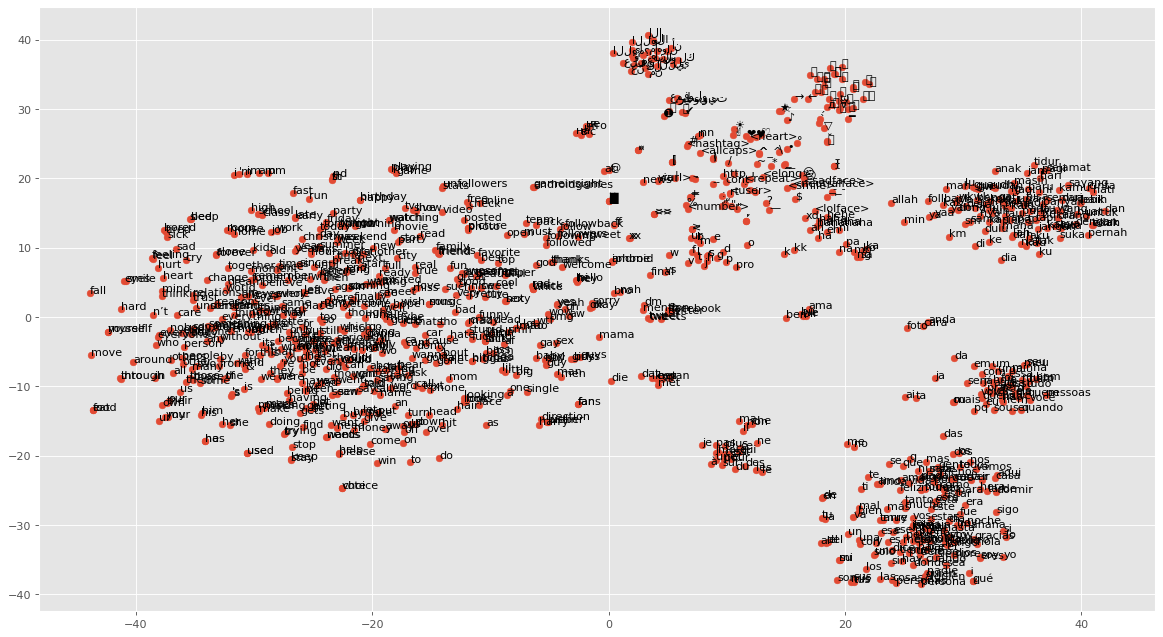

In [226]:
plt.figure(figsize=(18, 10), dpi=80)
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

# Building DL Models

## LSTM, GRU, RNN Models

In [117]:
class LSTM_Model:
    model= Model()
    X_test=[]
    y_test=[]
    embedding_matrix=[]
    
    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)
        return tokenizer,dataframe
    
    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
        X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val
    
    def tokenizeAndEmbedding(self,dataframe):
        tokenizer, X = self.wordTokenizer(dataframe[dataframe.columns[1]]) #Description column is the Feature Data
        y = np.asarray(dataframe[dataframe.columns[4]]) #New_Assignment_Groups column as Y  or Target is an encoded column
        X = pad_sequences(X, maxlen = maxlen)
        self.embedding_matrix = np.zeros((numWords+1, 100))
        for i,word in tokenizer.index_word.items():
            if i<numWords+1:
                embedding_vector = embeddings_index.get(word) # embeddings_index is having word2vec embedding
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        return X,y
    
    def train(self, dataframe, batch_size, epochs):
        X,y = self.tokenizeAndEmbedding(dataframe)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
        return model_history
    
    def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense = Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   
        self.model = Model(input_layer,out)
        self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        self.model.summary()
        plot_model(self.model,to_file="LSTM_Model.jpg", show_shapes=True, show_layer_names=True)
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, 
                                     monitor='val_accuracy',
                                     save_best_only=True, 
                                     mode='auto') 
        
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = self.model.fit(X_train,y_train,
                                       batch_size=batch_size, 
                                       epochs=epochs, 
                                       callbacks=[checkpoint,reduceLoss], 
                                       validation_data=(X_Val,y_Val))
        
        return model_history,self.model
    
    def prediction(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        accuracy = metrics.accuracy_score(self.y_test, pred)
        print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))

        return accuracy
    
    def plotModelAccuracy(self, history, modelname):
        plt.figure(figsize=(18, 10), dpi=80)
        #plt.rcParams['figure.facecolor'] = 'white'
        #plt.rcParams['axes.facecolor'] = 'azure'
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.savefig('LSTM_Model_Accuracy.png')
        plt.show()
        
        plt.figure(figsize=(18, 10), dpi=80)
        #plt.rcParams['figure.facecolor'] = 'white'
        #plt.rcParams['axes.facecolor'] = 'white'
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()
        
    def classificationMatrixModel(self):
         pred = self.model.predict(self.X_test)
         pred = [i.argmax() for i in pred]
         matrix = metrics.confusion_matrix(self.y_test, pred)
         print(classification_report(self.y_test, pred))
         return matrix

In [227]:
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData, trainingtime):
    if resetData == 1:
        tempResultsDf=pd.DataFrame()
        dataframe=pd.DataFrame()
    else:
        index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
        tempResultsDf= pd.DataFrame(
            {'model':[modelName], 
             'val_accuracy': [acc_value],
             'val_loss':[modelHistory.history['val_loss'][index]],
             'loss':[modelHistory.history['loss'][index]],
             'accuracy':[modelHistory.history['accuracy'][index]],
             'trainingtime': [trainingtime],
             'descriptions':[descriptions]},index={str(index_df)})
        dataframe = pd.concat([dataframe,tempResultsDf])
        dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions', 'trainingtime']] 
    return dataframe

In [228]:
def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
    if resetData == 1:
        tempResultsDf=pd.DataFrame()
        dataframe=pd.DataFrame()
    else:
        tempResultsDf= pd.DataFrame(
            {'model':[modelName], 
             'Pred_Accuracy' : [pred_accuracy],
             'descriptions':[descriptions]},index={str(index_df)})
        dataframe = pd.concat([dataframe,tempResultsDf])
        dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
    return dataframe

In [124]:
class LSTM_Model_GloVe:
    model= Model()
    X_test=[]
    y_test=[]
    embedding_matrix=[]
    
    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)
        return tokenizer,dataframe
    
    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
        X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val
    
    def tokenizeAndEmbedding(self,dataframe):
        tokenizer, X = self.wordTokenizer(dataframe[dataframe.columns[1]]) #Description column is the Feature Data
        y = np.asarray(dataframe[dataframe.columns[4]]) #New_Assignment_Groups column as Y  or Target is an encoded column
        X = pad_sequences(X, maxlen = maxlen)
        self.embedding_matrix = np.zeros((numWords+1, 200)) # change it to 200 as the glove embedding dimension is of size 200
        for i,word in tokenizer.index_word.items():
            if i<numWords+1:
                embedding_vector = embeddings_glove.get(word) # call corresponding word glove embedding  # embeddings_index.get(word) 
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        return X,y
    
    def train(self, dataframe, batch_size, epochs):
        X,y = self.tokenizeAndEmbedding(dataframe)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
        return model_history
    
    def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(numWords+1,output_dim=200,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  # Change the dimension to 200 as the embed size is 200
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense = Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   
        self.model = Model(input_layer,out)
        self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        self.model.summary()
        plot_model(self.model,to_file="LSTM_Model.jpg", show_shapes=True, show_layer_names=True)
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, 
                                     monitor='val_accuracy',
                                     save_best_only=True, 
                                     mode='auto') 
        
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = self.model.fit(X_train,y_train,
                                       batch_size=batch_size, 
                                       epochs=epochs, 
                                       callbacks=[checkpoint,reduceLoss], 
                                       validation_data=(X_Val,y_Val))
        
        return model_history,self.model
    
    def prediction(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        accuracy = metrics.accuracy_score(self.y_test, pred)
        print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
        return accuracy

    def classificationMatrixModel(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        matrix = metrics.confusion_matrix(self.y_test, pred)
        print(classification_report(self.y_test, pred))
        return matrix
    
    def plotModelAccuracy(self, history, modelname):
        plt.figure(figsize=(18, 10), dpi=80)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()
        
        plt.figure(figsize=(18, 10), dpi=80)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

In [161]:
class LSTM_Model_GloVe_GRU:
    model= Model()
    X_test=[]
    y_test=[]
    embedding_matrix=[]
    
    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)
        return tokenizer,dataframe
    
    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
        X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val
    
    def tokenizeAndEmbedding(self,dataframe):
        tokenizer, X = self.wordTokenizer(dataframe[dataframe.columns[1]]) #Description column is the Feature Data
        y = np.asarray(dataframe[dataframe.columns[4]]) #New_Assignment_Groups column as Y  or Target is an encoded column
        X = pad_sequences(X, maxlen = maxlen)
        self.embedding_matrix = np.zeros((numWords+1, 200)) # change it to 200 as the glove embedding dimension is of size 200
        for i,word in tokenizer.index_word.items():
            if i<numWords+1:
                embedding_vector = embeddings_glove.get(word) # embeddings_index.get(word) 
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        return X,y
    
    def train(self, dataframe, batch_size, epochs):
        X,y = self.tokenizeAndEmbedding(dataframe)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
        return model_history
    
    def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(numWords+1,output_dim=200,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  # Change the dimension to 200 as the embed size is 200
        gru=GRU(128)(embed)
        drop=Dropout(0.3)(gru)
        dense = Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   
        self.model = Model(input_layer,out)
        self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        self.model.summary()
        plot_model(self.model,to_file="LSTM_Model.jpg", show_shapes=True, show_layer_names=True)
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, 
                                     monitor='val_accuracy',
                                     save_best_only=True, 
                                     mode='auto') 
        
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = self.model.fit(X_train,y_train,
                                       batch_size=batch_size, 
                                       epochs=epochs, 
                                       callbacks=[checkpoint,reduceLoss], 
                                       validation_data=(X_Val,y_Val))
        
        return model_history,self.model
    
    def prediction(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        accuracy = metrics.accuracy_score(self.y_test, pred)
        print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
        return accuracy

    def classificationMatrixModel(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        matrix = metrics.confusion_matrix(self.y_test, pred)
        print(classification_report(self.y_test, pred))
        return matrix
    
    def plotModelAccuracy(self, history, modelname):
        plt.figure(figsize=(18, 10), dpi=80)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()
        
        plt.figure(figsize=(18, 10), dpi=80)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

In [272]:
class RNN_Model_GloVe:
    X_test=[]
    y_test=[]
    embedding_matrix=[]
    
    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)
        return tokenizer,dataframe
    
    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
        X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val
    
    def tokenizeAndEmbedding(self,dataframe):
        tokenizer, X = self.wordTokenizer(dataframe[dataframe.columns[1]]) #Description column is the Feature Data
        y = np.asarray(dataframe[dataframe.columns[4]]) #New_Assignment_Groups column as Y  or Target is an encoded column
        X = pad_sequences(X, maxlen = maxlen)
        self.embedding_matrix = np.zeros((numWords+1, 200)) # change it to 200 as the glove embedding dimension is of size 200
        for i,word in tokenizer.index_word.items():
            if i<numWords+1:
                embedding_vector = embeddings_glove.get(word) # embeddings_index.get(word) 
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        return X,y
    
    def train(self, dataframe, batch_size, epochs):
        X,y = self.tokenizeAndEmbedding(dataframe)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        
        embed = Embedding(numWords+1,output_dim=200,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)
        model=Sequential()
        model.add(Input(shape=(maxlen,),dtype=tf.int64))
        model.add(embed)
        model.add(Conv1D(100,10,activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.3))
        model.add(Conv1D(100,10,activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Bidirectional(LSTM(128)))
        model.add(Dropout(0.3))
        model.add(Dense(100,activation='relu'))
        model.add(Dense(len((pd.Series(y_train)).unique()),activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

        model.summary()
        plot_model(model,to_file="RNN_Model_GloVe.jpg")
         
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        model_history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val, y_Val))
        return model_history, model
    
    def prediction(self, model): # def prediction(self):
        pred = model.predict(self.X_test) #self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        accuracy = metrics.accuracy_score(self.y_test, pred)
        print("Accuracy of the model :", metrics.accuracy_score(self.y_test, pred))
        return accuracy

    def classificationMatrixModel(self, model):
        pred = model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        matrix = metrics.confusion_matrix(self.y_test, pred)
        print(classification_report(self.y_test, pred))
        return matrix
    
    def plotModelAccuracy(self, history, modelname):
        plt.figure(figsize=(18, 10), dpi=80)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()
        
        plt.figure(figsize=(18, 10), dpi=80)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

# DL Model 1 Training :  LSTM (Word2Vec, Dataset 3)

In [229]:
data_3_resampled.head(2).T

,0,1
Short description,collaboration_platform site is not opening,account locked.
Description,collaboration platform site open collaboration...,account lock account lock account lock
Caller,anpocezt qturbxsg,bkyphsgq cfyksehu
Assignment group,GRP_0,GRP_0
New_Assignment_Groups,0,0
Text_length,85,29
Dominant_Topic,0,0
Topic_Perc_Contrib,0.5195,0.9538
Keywords,"issue, unable, tool, user, error, work, access...","issue, unable, tool, user, error, work, access..."
Text,"['site', 'open', 'site', 'open', 'site', 'open...","['lock', 'account', 'lock']"


In [230]:
#data_1.shape, data_1.columns[4] , data_1.shape, data_1.columns[1], len(data_1[data_1.columns[4]].value_counts().sort_values(ascending=False))

data_3_resampled.shape, data_3_resampled.columns[4] , data_3_resampled.shape, data_3_resampled.columns[1], len(data_3_resampled[data_3_resampled.columns[4]].value_counts().sort_values(ascending=False))

((47675, 10), 'New_Assignment_Groups', (47675, 10), 'Description', 74)

In [231]:
maxlen = 300
numWords=9000
epochs = 10
embed_size = 100
results=pd.DataFrame()
pred_results = pd.DataFrame()

In [232]:
LSTM_Model_data_3_resampled = LSTM_Model()

In [233]:
start = time.time() 
LSTM_Model_data_3_resampled_history, model = LSTM_Model_data_3_resampled.train(data_3_resampled.sample(frac = 1.0) ,embed_size,epochs)
time.sleep(1)
end = time.time()
print(f"Time Taken To Train LSTM on dataset 3 with labels: {end - start}")

Number of Samples: 47675
Number of Labels:  47675
Number of train Samples: 38140
Number of val Samples: 9535
Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 300, 100)          900100    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_21 (Dense)             (None, 74)                7474      
Total para

In [234]:
import pydotplus as pydot
import graphviz 
from tensorflow import keras  
from tensorflow.keras.utils import plot_model 

#plot_model(LSTM_Model_data_3_resampled, to_file='LSTM_Model_data_3_resampled.png', show_shapes=True, show_layer_names=True)

In [235]:
#LSTM_Model_data_1_accuracy = LSTM_Model_data_1.prediction()
LSTM_Model_data_3_resampled_accuracy = LSTM_Model_data_3_resampled.prediction()

Accuracy of the model : 0.9516518091242789


###  Classification Report and Confusion Matrix

In [123]:
LSTM_Model_data_3_resampled.classificationMatrixModel()

              precision    recall  f1-score   support

           0       0.84      0.56      0.67       133
           1       1.00      0.85      0.92       124
           2       0.98      0.77      0.86       130
           3       1.00      1.00      1.00       130
           4       0.94      0.91      0.93       129
           5       0.99      0.94      0.97       124
           6       0.95      0.96      0.96       138
           7       1.00      1.00      1.00       125
           8       0.99      1.00      1.00       137
           9       1.00      1.00      1.00       143
          10       1.00      0.95      0.98       108
          11       0.91      0.90      0.90       117
          12       0.94      0.88      0.91       136
          13       0.99      1.00      0.99       158
          14       1.00      1.00      1.00       106
          15       0.99      1.00      1.00       126
          16       0.99      1.00      1.00       137
          17       0.99    

array([[ 74,   0,   0, ...,   0,   0,   0],
       [  0, 105,   0, ...,   0,   0,   0],
       [  0,   0, 100, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 125,   0,   0],
       [  0,   0,   0, ...,   0,  64,   0],
       [  0,   0,   0, ...,   0,   0,  36]])

The training and testing accuracies are above 90 %. The model is not overfitting.

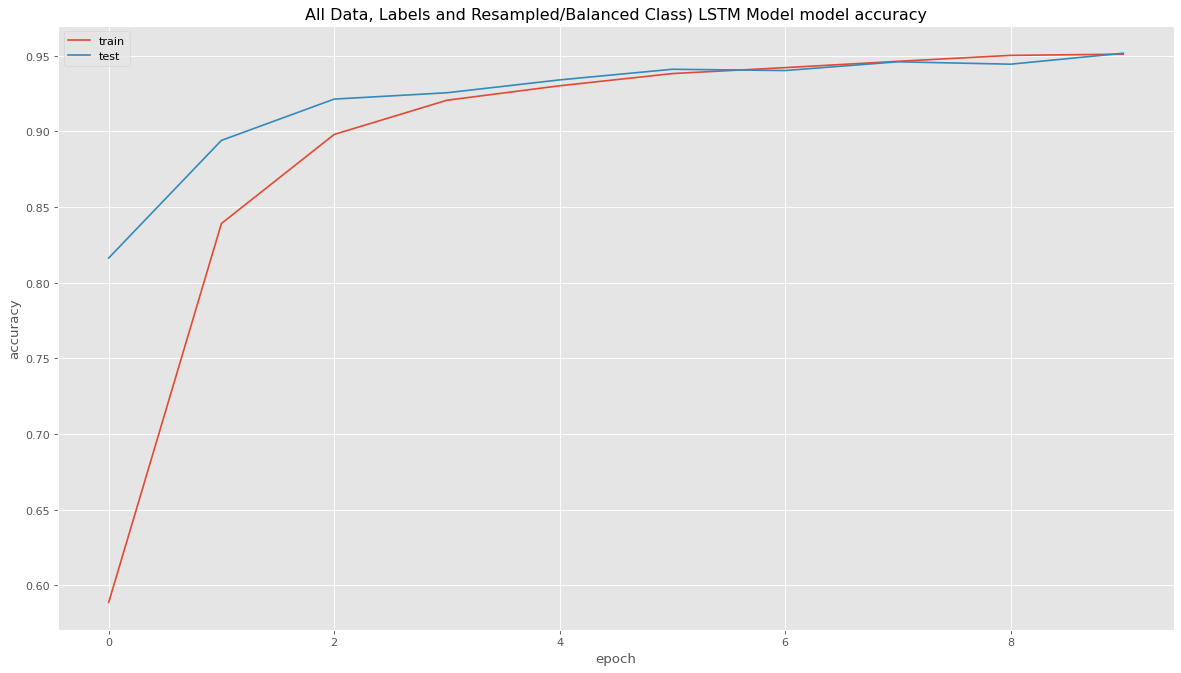

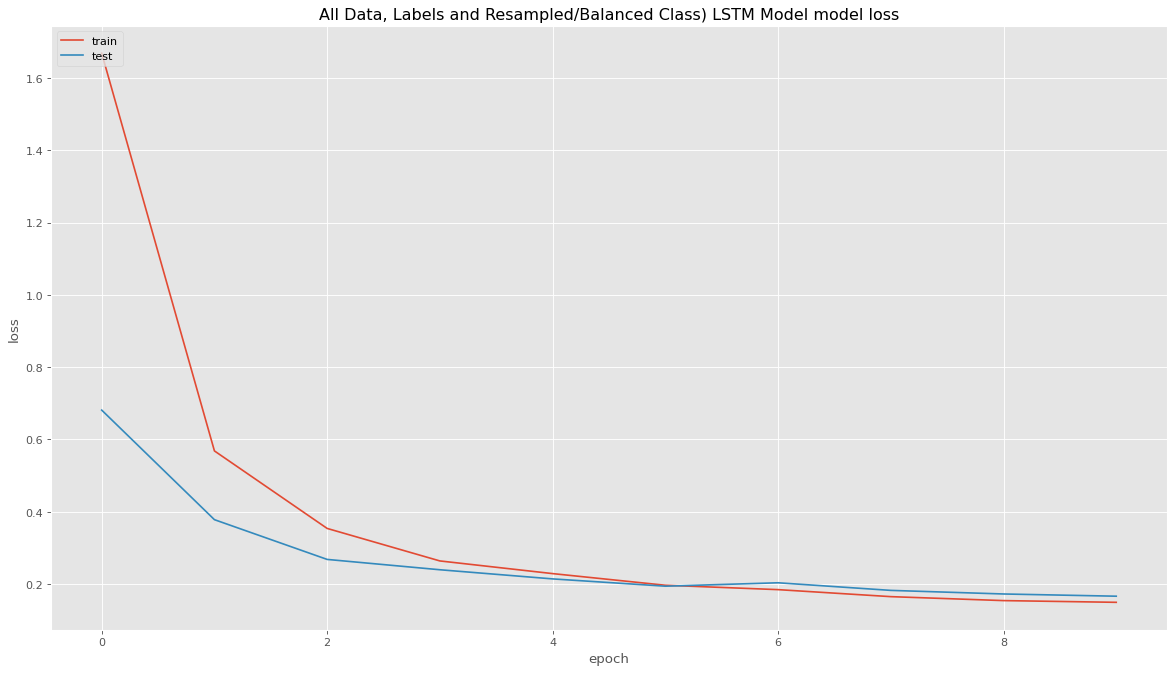

In [236]:
#LSTM_Model_data_1.plotModelAccuracy(LSTM_Model_data_1_history, 'All Data, Binary Labels and Unsampled (But Balanced Class) LSTM Model')
LSTM_Model_data_3_resampled.plotModelAccuracy(LSTM_Model_data_3_resampled_history,  'All Data, Labels and Resampled/Balanced Class) LSTM Model' )

In [237]:
results = None

In [238]:
results=captureData(results,LSTM_Model_data_3_resampled_history,'LSTM_Model_data_3_resampled','LSTM Model + Word2Vec Embedding on data_3_resampled Dataset','1',0, (end - start))
pred_results= capturePrediction(pred_results,'LSTM_Model_data_3_resamp1ed','LSTM Model + Word2Vec Embedding on data_3_resampled Dataset','1',LSTM_Model_data_3_resampled_accuracy,0)

In [139]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions,trainingtime
1,LSTM_Model_data_3_resampled,0.941164,0.183226,0.145094,0.951993,LSTM Model + Word2Vec Embedding on data_3_resa...,230.886418


In [239]:
pred_results

,model,Pred_Accuracy,descriptions
1,LSTM_Model_data_3_resamp1ed,0.951652,LSTM Model + Word2Vec Embedding on data_3_resa...


# DL Model 2 Training: LSTM (GloVe, Dataset 3)

In [240]:
maxlen = 300
numWords=9000
epochs = 10
embed_size = 200
LSTM_Model_data_3_resampled_Glove = LSTM_Model_GloVe()

In [241]:
start = time.time() 
LSTM_Model_data_3_resampled_Glove_history, model = LSTM_Model_data_3_resampled_Glove.train(data_3_resampled.sample(frac = 1.00) ,embed_size,epochs)
time.sleep(1)
end = time.time()
print(f"Time Taken To Train LSTM on dataset 3 with labels: {end - start}")

Number of Samples: 47675
Number of Labels:  47675
Number of train Samples: 30512
Number of val Samples: 7628
Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 300, 200)          1800200   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 256)               336896    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_23 (Dense)             (None, 74)                7474      
Total para

In [242]:
import pydotplus as pydot
import graphviz 
from tensorflow import keras  
from tensorflow.keras.utils import plot_model 
#plot_model(LSTM_Model_data_3_resampled, to_file='LSTM_Model_data_3_resampled.png', show_shapes=True, show_layer_names=True)

In [243]:
LSTM_Model_data_3_resampled_Glove_accuracy = LSTM_Model_data_3_resampled_Glove.prediction()

Accuracy of the model : 0.9391714735186156


### Classification report and confusion matrix

In [244]:
LSTM_Model_data_3_resampled_Glove.classificationMatrixModel()

              precision    recall  f1-score   support

           0       0.71      0.56      0.63       142
           1       0.98      0.83      0.90       131
           2       0.96      0.85      0.90       128
           3       0.99      1.00      1.00       132
           4       0.87      0.85      0.86       131
           5       0.98      0.92      0.95       133
           6       0.96      0.96      0.96       143
           7       0.98      1.00      0.99       125
           8       0.97      1.00      0.99       133
           9       1.00      1.00      1.00       123
          10       0.94      0.93      0.93       122
          11       0.90      0.90      0.90       125
          12       0.91      0.84      0.87       128
          13       1.00      1.00      1.00       124
          14       0.99      1.00      1.00       122
          15       0.98      1.00      0.99       119
          16       0.96      1.00      0.98       101
          17       0.94    

array([[ 80,   0,   1, ...,   0,   1,   0],
       [  0, 109,   0, ...,   0,   0,   0],
       [  0,   0, 109, ...,   0,   0,  17],
       ...,
       [  0,   0,   0, ..., 129,   0,   0],
       [  0,   0,   1, ...,   0,  68,  43],
       [  0,   0,   0, ...,   0,   0, 138]])

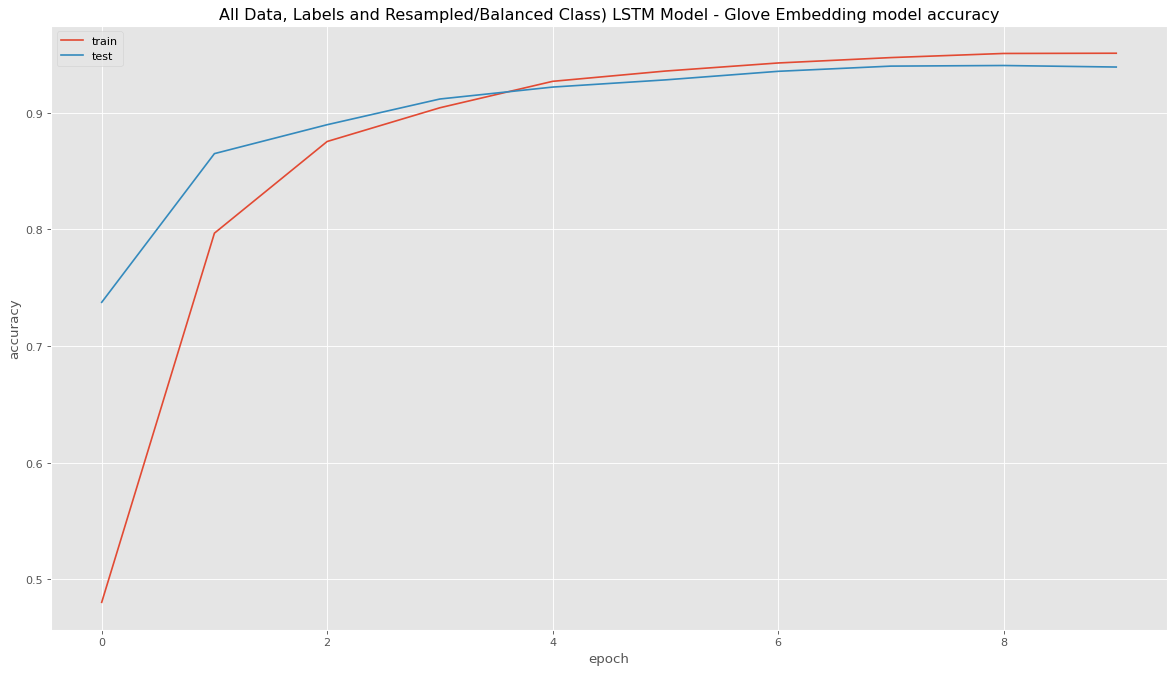

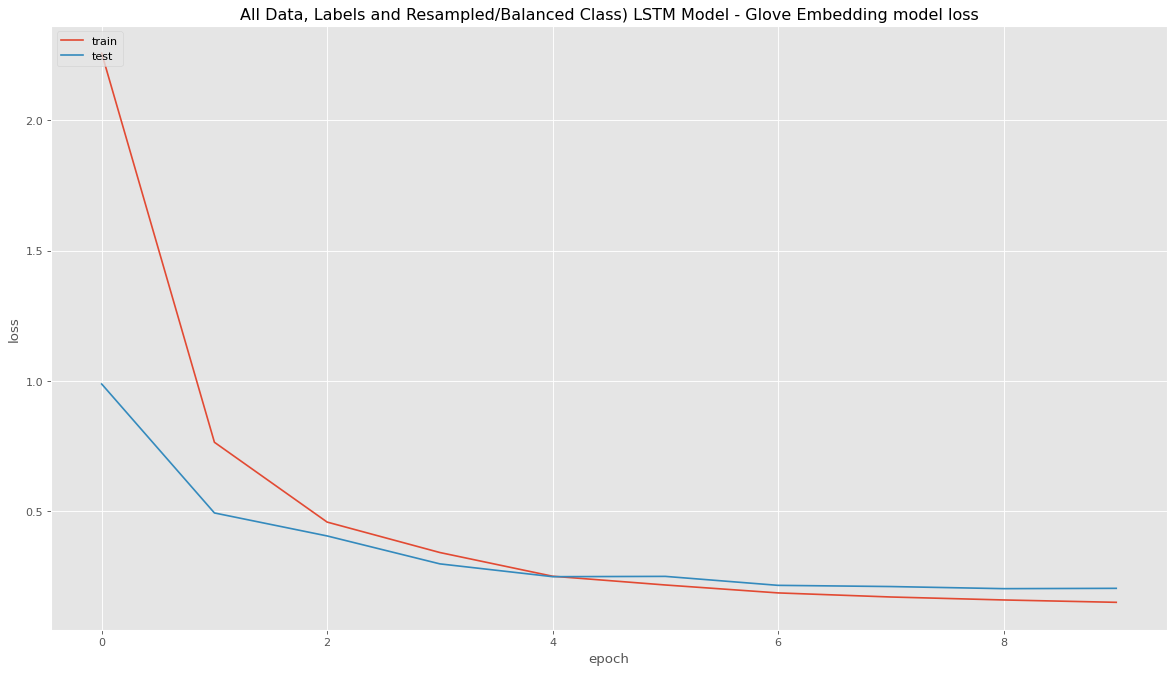

In [245]:
LSTM_Model_data_3_resampled_Glove.plotModelAccuracy(LSTM_Model_data_3_resampled_Glove_history, 'All Data, Labels and Resampled/Balanced Class) LSTM Model - Glove Embedding')

In [246]:
results=captureData(results,LSTM_Model_data_3_resampled_Glove_history,'LSTM_Model_data_3_resampled_Glove','LSTM Model + Glove Embedding on data_3_resampled Dataset','1',0,(end - start))
pred_results= capturePrediction(pred_results,'LSTM_Model_data_3_resamp1ed_Glove','LSTM Model + Glove Embedding on data_3_resampled Dataset','1',LSTM_Model_data_3_resampled_Glove_accuracy,0)

In [172]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions,trainingtime
1,LSTM_Model_data_3_resampled,0.941164,0.183226,0.145094,0.951993,LSTM Model + Word2Vec Embedding on data_3_resa...,230.886418
1,LSTM_Model_data_3_resampled_Glove,0.941662,0.204569,0.155579,0.950446,LSTM Model + Glove Embedding on data_3_resampl...,174.773299
1,LSTM_Model_data_3_resampled_Glove,0.941662,0.204569,0.155579,0.950446,LSTM Model + Glove Embedding on data_3_resampl...,116.138485


In [247]:
pred_results

,model,Pred_Accuracy,descriptions
1,LSTM_Model_data_3_resamp1ed,0.951652,LSTM Model + Word2Vec Embedding on data_3_resa...
1,LSTM_Model_data_3_resamp1ed_Glove,0.939171,LSTM Model + Glove Embedding on data_3_resampl...


Note: LSTM Model with glove embedding is also analyzed. The training and test accuracies are similar. Model is not over fitting. There is not much difference with word to vect and glove embedding tried with LSTM model. Word Embedding is the efficient way for text data vectorization and we have used both Word2Vec and GloVe embedding to experiment with the models. The first one is shallow two layer NN trained on large corpus of text to produce a vector for a text (each word) in the corpus. GloVe is unsupervised learning based vector representation of words. The training is performed on an aggregated global word-word co-occurrence statistics from a corpus and the resulting representations have linear substructures of the words in the vector space. We have explored both the types of embedding with LSTM model. We have not encountered significant difference in terms of its impact on the model performance as seen from above. 

# DL Model 3 Training: Gated Recurrent Unit (GRU) (GloVe, Dataset 3)

Note: GRU (Gated Recurrent Unit) aims to solve the vanishing gradient problem which comes with a standard recurrent neural network. It can also be considered as a variation on the LSTM because both are designed similarly and, in some cases, produce equally excellent results. This model got rid of the cell state and used the hidden state to transfer information. It uses only 2 gates, update gate and reset gate. Basically, these are two vectors which decide what information should be passed to the output. The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add. The reset gate is another gate used to decide how much past information to forget.  GRU’s has fewer tensor operations; therefore, they are a little speedier to train than LSTM’s. The GRU model gave accuracies similar to LSTM. The model is not overfitting as well.

In [248]:
maxlen = 300
numWords=9000
epochs = 10
embed_size = 200
LSTM_Model_data_3_resampled_Glove_GRU = LSTM_Model_GloVe_GRU()

In [249]:
start = time.time() 
LSTM_Model_data_3_resampled_Glove_GRU_history, model = LSTM_Model_data_3_resampled_Glove_GRU.train(data_3_resampled.sample(frac = 1.00) ,embed_size,epochs)
time.sleep(1)
end = time.time()
print(f"Time Taken To Train LSTM on data_1 dataset with labels: {end - start}")

Number of Samples: 47675
Number of Labels:  47675
Number of train Samples: 30512
Number of val Samples: 7628
Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 300, 200)          1800200   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               126720    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_25 (Dense)             (None, 74)                7474      
Total para

In [250]:
import pydotplus as pydot
import graphviz 
from tensorflow import keras  
from tensorflow.keras.utils import plot_model 
#plot_model(LSTM_Model_data_3_resampled, to_file='LSTM_Model_data_3_resampled.png', show_shapes=True, show_layer_names=True)

In [251]:
LSTM_Model_data_3_resampled_Glove_GRU_accuracy = LSTM_Model_data_3_resampled_Glove_GRU.prediction()

Accuracy of the model : 0.940744625065548


**Classification Report and Confusion Matrix**

In [252]:
LSTM_Model_data_3_resampled_Glove_GRU.classificationMatrixModel()

              precision    recall  f1-score   support

           0       0.89      0.59      0.71       123
           1       0.91      1.00      0.95       142
           2       0.96      0.83      0.89       120
           3       0.99      1.00      1.00       132
           4       0.95      0.81      0.88       147
           5       0.99      0.96      0.97       116
           6       0.93      0.95      0.94       132
           7       1.00      1.00      1.00       122
           8       0.97      1.00      0.98       127
           9       0.99      1.00      1.00       126
          10       0.94      0.94      0.94       141
          11       0.92      0.88      0.90       129
          12       0.89      0.92      0.91       115
          13       0.99      1.00      1.00       126
          14       1.00      1.00      1.00       114
          15       1.00      1.00      1.00       141
          16       1.00      1.00      1.00       117
          17       0.96    

array([[ 72,   0,   0, ...,   0,   0,   1],
       [  0, 142,   0, ...,   0,   0,   0],
       [  0,   0, 100, ...,   0,   0,  14],
       ...,
       [  0,   0,   0, ..., 127,   0,   0],
       [  0,   0,   2, ...,   0,  73,  45],
       [  0,   0,   0, ...,   0,   0, 109]])

The training and test accuracies are above 90 percent. The model is not overfitting.

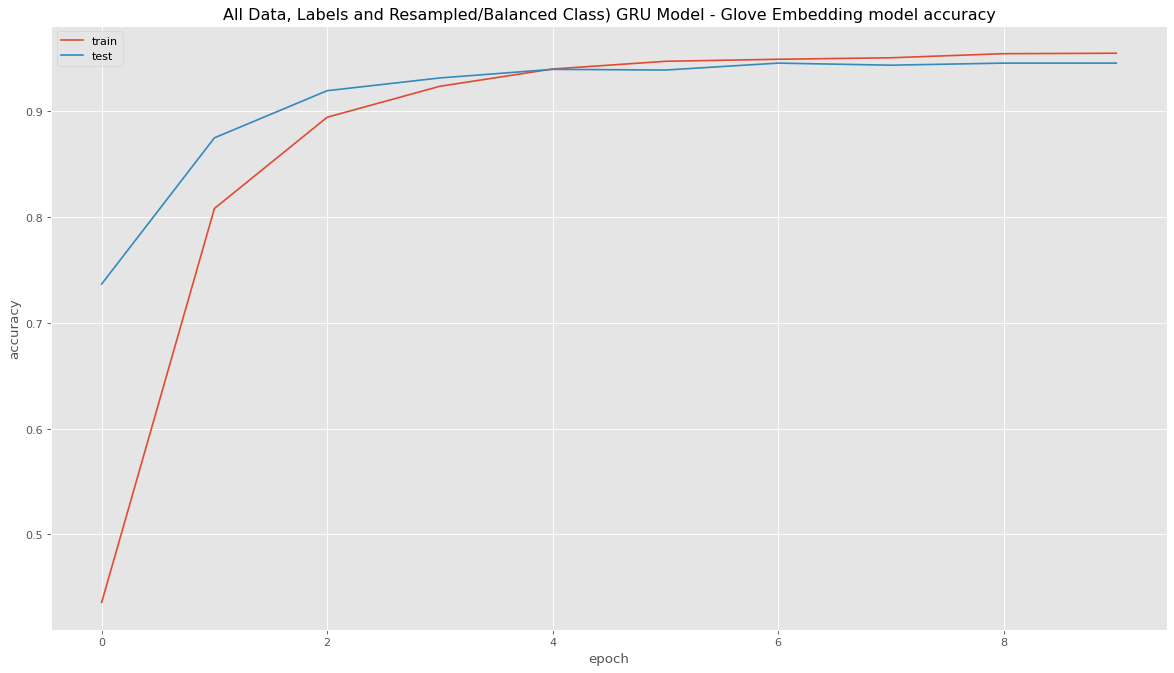

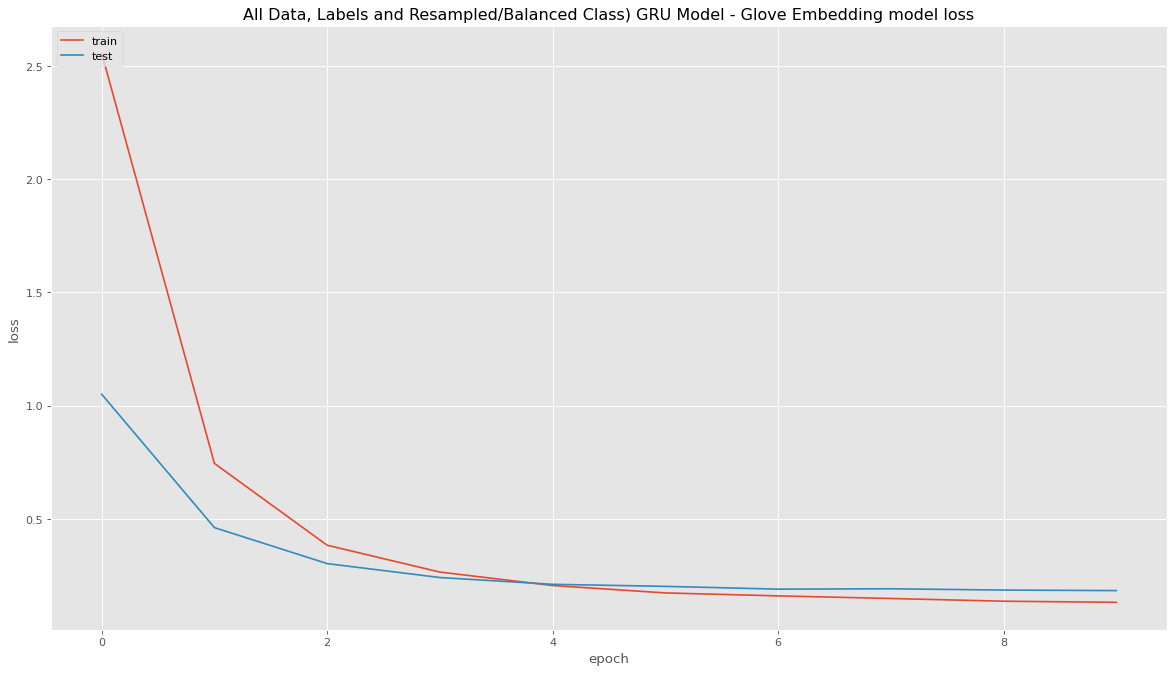

In [253]:
LSTM_Model_data_3_resampled_Glove_GRU.plotModelAccuracy(LSTM_Model_data_3_resampled_Glove_GRU_history, 'All Data, Labels and Resampled/Balanced Class) GRU Model - Glove Embedding')

In [254]:
results=captureData(results,LSTM_Model_data_3_resampled_Glove_GRU_history,'LSTM_Model_data_3_resampled_Glove_GRU','GRU Model + Glove Embedding on data_3_resampled Dataset','1',0, (end - start))
pred_results= capturePrediction(pred_results,'LSTM_Model_data_3_resamp1ed_Glove_GRU','GRU Model + Glove Embedding on data_3_resampled Dataset','1',LSTM_Model_data_3_resampled_Glove_accuracy,0)

In [255]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions,trainingtime
1,LSTM_Model_data_3_resampled,0.951652,0.166395,0.149461,0.951023,LSTM Model + Word2Vec Embedding on data_3_resa...,232.357994
1,LSTM_Model_data_3_resampled_Glove,0.940482,0.202680,0.159327,0.950806,LSTM Model + Glove Embedding on data_3_resampl...,181.010316
1,LSTM_Model_data_3_resampled_Glove_GRU,0.945726,0.188992,0.159192,0.949364,GRU Model + Glove Embedding on data_3_resample...,116.235393


In [256]:
pred_results

,model,Pred_Accuracy,descriptions
1,LSTM_Model_data_3_resamp1ed,0.951652,LSTM Model + Word2Vec Embedding on data_3_resa...
1,LSTM_Model_data_3_resamp1ed_Glove,0.939171,LSTM Model + Glove Embedding on data_3_resampl...
1,LSTM_Model_data_3_resamp1ed_Glove_GRU,0.939171,GRU Model + Glove Embedding on data_3_resample...


# DL Model 4 Training: RNN (GloVe, Dataset 3)

Note: Recurrent Neural Networks (RNNs) are a family of neural networks designed specifically for sequential data processing. The RNN model does prediction of the next word in a sequence based on the previous ones. This operation is performed recurrently which is why it is called as Recurrent Neural Networks.  It repetitively performs the same task for every element of a sequence, with the output being dependent on the previous computations. In short it has a memory of the text used in a sequence used for classification of the text both from the type of texts and the sequence of appearance as well. There are known inherent issues in RNN which are addressed in the subsequent model of LSTM. Note: RNN model gave traing accuracy of 44.19 % and testing accuracy of 42.50 %. The model is not overfitting either. We would like further tweak with its architecture in the next iteration.

In [274]:
maxlen = 300
numWords=9000
epochs = 10
embed_size = 200
RNN_Model_data_3_resampled_Glove = RNN_Model_GloVe()

In [275]:
start = time.time() 
RNN_Model_data_3_resampled_Glove_history, RNN_model = RNN_Model_data_3_resampled_Glove.train(data_3_resampled.sample(frac =1.00) ,embed_size,epochs)
time.sleep(1)
end = time.time()
print(f"Time Taken To Train RNN on data_1 dataset with labels: {end - start}")

Number of Samples: 47675
Number of Labels:  47675
Number of train Samples: 38140
Number of val Samples: 9535
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 200)          1800200   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 291, 100)          200100    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 145, 100)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 145, 100)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 68, 100)           0         
___________

In [276]:
import pydotplus as pydot
import graphviz 
from tensorflow import keras  
from tensorflow.keras.utils import plot_model 
#plot_model(RNN_Model_data_3_resampled_Glove, to_file='RNN_Model_data_3_resampled_Glove.png', show_shapes=True, show_layer_names=True)

In [283]:
RNN_Model_data_3_resampled_Glove_accuracy = RNN_Model_data_3_resampled_Glove.prediction(RNN_model)

Accuracy of the model : 0.945883586785527


**Classification Report and Confusion Matrix**

In [278]:
RNN_Model_data_3_resampled_Glove.classificationMatrixModel(RNN_model)

              precision    recall  f1-score   support

           0       0.88      0.56      0.68       131
           1       0.98      0.87      0.92       125
           2       0.98      0.76      0.86       121
           3       1.00      1.00      1.00       123
           4       0.95      0.92      0.94       126
           5       0.97      0.94      0.95       125
           6       0.97      0.98      0.98       128
           7       1.00      1.00      1.00       142
           8       0.98      1.00      0.99       130
           9       1.00      1.00      1.00       122
          10       0.98      0.94      0.96       125
          11       0.88      0.90      0.89       137
          12       0.89      0.93      0.91       118
          13       0.99      1.00      1.00       141
          14       1.00      1.00      1.00       118
          15       0.99      1.00      1.00       129
          16       0.99      1.00      1.00       134
          17       1.00    

The training and test accuracies are above 90 percent. The model is not overfitting.

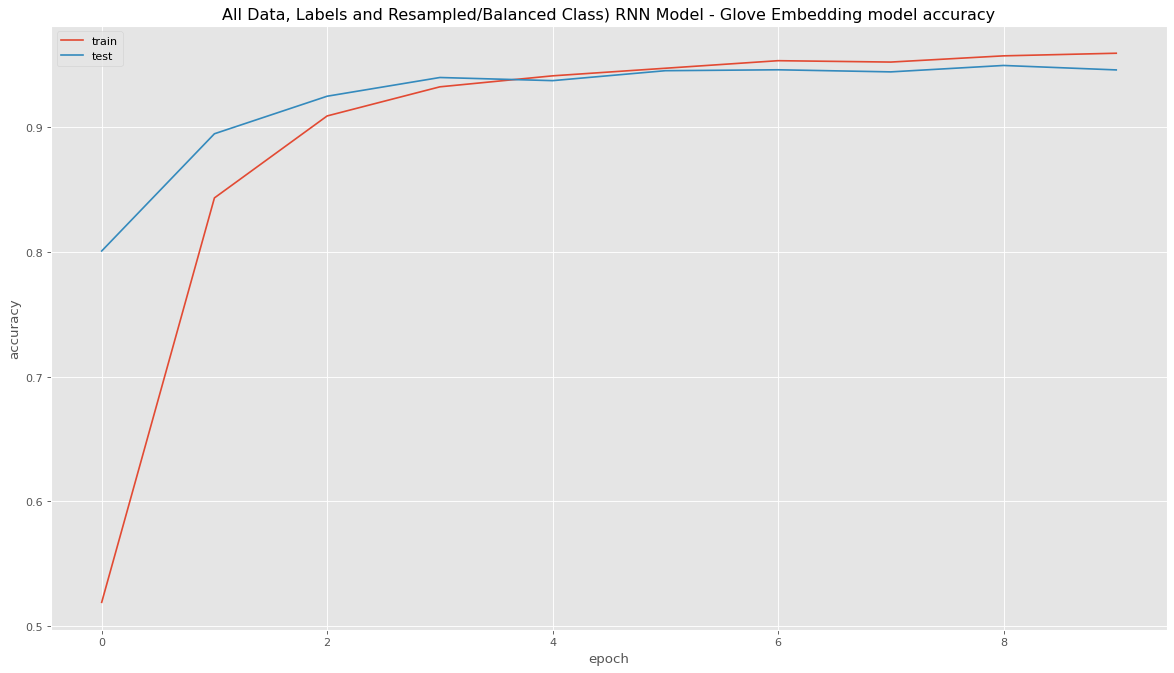

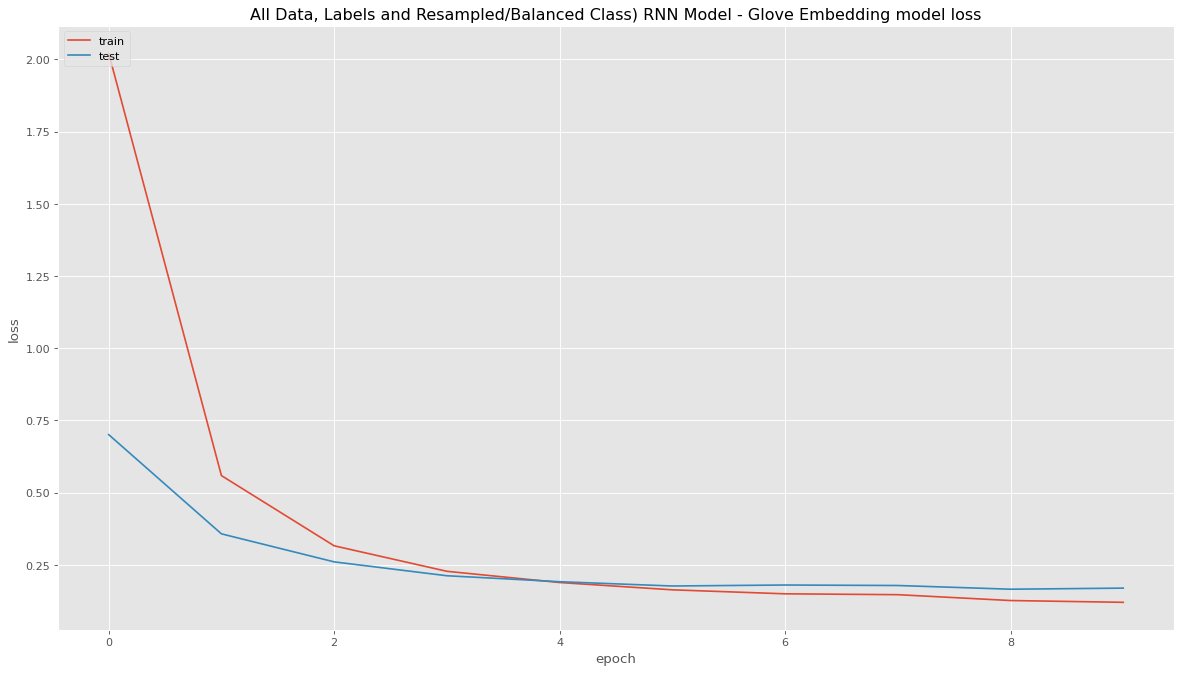

In [279]:
RNN_Model_data_3_resampled_Glove.plotModelAccuracy(RNN_Model_data_3_resampled_Glove_history, 'All Data, Labels and Resampled/Balanced Class) RNN Model - Glove Embedding')

In [309]:
results=captureData(results,RNN_Model_data_3_resampled_Glove_history,'RNN_Model_data_3_resampled_Glove','RNN Model + Glove Embedding on data_3_resampled Dataset','1',0, (end - start))
pred_results= capturePrediction(pred_results,'RNN_Model_data_3_resamp1ed_Glove','RNN Model + Glove Embedding on data_3_resampled Dataset','1',RNN_Model_data_3_resampled_Glove_accuracy,0)

In [310]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions,trainingtime
1,LSTM_Model_data_3_resampled,0.951652,0.166395,0.149461,0.951023,LSTM Model + Word2Vec Embedding on data_3_resa...,232.357994
1,LSTM_Model_data_3_resampled_Glove,0.940482,0.202680,0.159327,0.950806,LSTM Model + Glove Embedding on data_3_resampl...,181.010316
1,LSTM_Model_data_3_resampled_Glove_GRU,0.945726,0.188992,0.159192,0.949364,GRU Model + Glove Embedding on data_3_resample...,116.235393
1,RNN_Model_data_3_resampled_Glove,0.949449,0.165210,0.126011,0.957158,RNN Model + Glove Embedding on data_3_resample...,162.589867


In [311]:
pred_results 

,model,Pred_Accuracy,descriptions
1,LSTM_Model_data_3_resamp1ed,0.951652,LSTM Model + Word2Vec Embedding on data_3_resa...
1,LSTM_Model_data_3_resamp1ed_Glove,0.939171,LSTM Model + Glove Embedding on data_3_resampl...
1,LSTM_Model_data_3_resamp1ed_Glove_GRU,0.939171,GRU Model + Glove Embedding on data_3_resample...
1,RNN_Model_data_3_resamp1ed_Glove,0.945884,RNN Model + Glove Embedding on data_3_resample...


### Summary
The deep learning models are explored. Performance is also evaluated. Please refer the graphs and also the report for more details on each of the models.

| Model | Test accuracy |
| :- | -: |
|  Bidirectional LSTM – With Word2Vec | 0.951652
|  Bidirectional LSTM – Glove Embedding | 0.939171
| GRU Glove | 0.939171	
| RNN Glove| 0.945884	

In Part 5/6, Machine learning models are explored